# EXECUTIVE SUMMARY



## Business Problem Identification


   Company X is a major auto insurer in the United States. In the face of a weak global economy, few 
   
opportunities for product and price differentiation and a relatively mature insurance industry, the 

company is compelled to search for non-traditional ways to grow its bottom-line. As is usually the case 

in this economic environment, where companies face revenue pressures, they typically try to increase 

profitability by generating cost and operational efficiencies. Company X is not immune to the foregoing

economic conditions and has decided to pursue data-driven strategies to drive increased profitability 

through effective cost-management. The principals of the company believe that one of the ways in which it

can generate cost-efficiencies is by minimizing or eliminating the cost associated with its various 

customer touchpoints, particularly the cost involved in fielding service payment calls.

   Company X offers its policyholders multiple avenues for meeting their service needs. While the company
   
affords its policyholders the flexibility to make their payments through a myriad of different vehicles,

including the option to pay over the phone through a counselor, Company X realizes that more value can be 

generated for all its stakeholders by encouraging its customers to self-serve with respect to paying 

their monthly insurance premiums.

   Therefore, the critical issue facing Company X is that it needs to formulate a robust data-driven 
   
strategy for migrating its policyholders toward the more cost-effective self-service channels such as

online or through the automated phone system without diminishing the customers' value perception of its 

service.

   A consultant has been commissioned to leverage predictive analytics to identify policyholders who have the propensity to pay over 
   
the phone through a counselor, which will enable it to pre-emptively send them email messages encouraging 

them to utilize one of the self-service platforms.


## Proposed Analytical Solution

 
   The problem that Company X faces involves segmenting its policyholders into two groups, i.e. those who
   
are most likely to make payment service calls(the least efficient service model) and those who are not 

(the best case scenario). This represents an analytical problem that deals with predicting group 

membership, which means that the outcome or dependent variable is binary or categorical. In this project,

the consultant will employ a suite of statistical and machine-learning tools that are optimized for 

discriminating between groups of observations, including Logistic Regression, XGBoost, Random Forest and

AdaBoost. The results of the various competing models will be evaluated and averaged to arrive at a 

composite score for the probability of a policyholder making a payment service call. Models will be

evaluated based on ROC statistics.




## Data Dictionary

1.  DATE_FOR              -  Date of Record Processing

2.  RTD_ST_CD             -  Rated State of Policy  

3.  CustomerSegment       -  Rated State of Policy

4.  Tenure                -  Years of Tenure with the Company

5.  Age                   -  Age of Policyholder

6.  MART_STATUS           -  Marital Status of Policyholder

7.  GENDER                -  Gender of Primary Insured

8.  CHANNEL1_6M           -  # payments made through Channel1 in the last 6 months

9.  CHANNEL2_6M           -  # payments made through Channel2 in the last 6 months

10. CHANNEL3_6M           -  # payments made through Channel3 in the last 6 months

11. CHANNEL4_6M           -  # payments made through Channel4 in the last 6 months

12. CHANNEL5_6M           -  # payments made through Channel5 in the last 6 months

13. METHOD1_6M            -  # payments made with method 1 in the last 6 months (irrespective of channel)

14. RECENT_PAYMENT        -  Payment made in the last 15 days (1/0)

15. PAYMENTS_6M           -  Total payments in the last 6 months                               

16. CHANNEL1_3M           -  # payments made through Channel1 in the last 3 months

17. CHANNEL2_3M           -  # payments made through Channel2 in the last 3 months

18. CHANNEL3_3M           -  # payments made through Channel3 in the last 3 months

19. CHANNEL4_3M           -  # payments made through Channel4 in the last 3 months

20. CHANNEL5_3M           -  # payments made through Channel5 in the last 3 months

21. CHANNEL2_3M           -  # payments made through Channel2 in the last 3 months

22. METHOD1_3M            -  # payments made with method 1 in the last 3 months (irrespective of channel)

23. PAYMENTS_3M           -  Total payments in the last 3 months    

24. NOT_DI_3M             -  Had this customer been enrolled in automated payments in the last 3 months? (1/0)

25. NOT_DI_6M             -  Had this customer been enrolled in automated payments in the last 6 months? (1/0)

26. EVENT1_30_FLAG        -  Had this customer been sent a cancellation notice in the last 30 days? (1/0)

27. EVENT2_90_SUM         -  How many cancellation notices have been sent in the last 90 days?)

28. LOGINS                -  How many times has this policy logged into self-service online in the last 30 days?

29. POLICYPURCHASECHANNEL -  How was this policy purchased?(1/0)

30. Call_Flag             -  Was there a service payment call?(1/0) *TARGET VARIABLE*




## Insurance Dataset


In [59]:
# to handle datasets
import pandas as pd
import numpy as np

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set_color_codes()
sns.set(font_scale=1.25)

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [25]:
# load dataset
data = pd.read_csv('ChrisBennett_Data1.csv')
data.head()

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,0.0,5.0,0.0,0.0,6.0,0,0,1,0,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,0.0,0.0,6.0,0.0,6.0,0,3,0,0,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,0.0,0.0,0.0,0.0,10.0,0,0,6,0,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


## Types of variables

Let's go ahead and find out what types of variables there are in this dataset

In [5]:
# let's inspect the type of variables in pandas
data.dtypes

DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment            int64
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M              float64
CHANNEL2_6M              float64
CHANNEL3_6M              float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
METHOD1_6M               float64
RECENT_PAYMENT           float64
PAYMENTS_6M              float64
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object

There are a mixture of categorical and numerical variables. Numerical are those of type int and float. Categorical those of type object. Also, some variables that should be of type int appear as float(CHANNEL1_6M, CHANNEL2_6M, CHANNEL3_6M, CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M). Those variables will be recasted as type int.

## Exploring Missing Values in the dataset



In [6]:
data.isnull().mean()

DATE_FOR                 0.000000
RTD_ST_CD                0.000000
CustomerSegment          0.000000
Tenure                   0.000000
Age                      0.000000
MART_STATUS              0.000000
GENDER                   0.000000
CHANNEL1_6M              0.006219
CHANNEL2_6M              0.006219
CHANNEL3_6M              0.006219
CHANNEL4_6M              0.006219
CHANNEL5_6M              0.006219
METHOD1_6M               0.006219
RECENT_PAYMENT           0.006219
PAYMENTS_6M              0.006219
CHANNEL1_3M              0.000000
CHANNEL2_3M              0.000000
CHANNEL3_3M              0.000000
CHANNEL4_3M              0.000000
CHANNEL5_3M              0.000000
METHOD1_3M               0.000000
PAYMENTS_3M              0.000000
NOT_DI_3M                0.000000
NOT_DI_6M                0.000000
EVENT1_30_FLAG           0.000000
EVENT2_90_SUM            0.000000
LOGINS                   0.000000
POLICYPURCHASECHANNEL    0.000000
Call_Flag                0.000000
dtype: float64

In [7]:
print('Total policyholders in the company: ',data.shape[0])
print('Percentage of data without missing values: ',data.dropna().shape[0]/ np.float(data.shape[0]))
print('Percentage of data with missing values: ', (1- (data.dropna().shape[0]/ np.float(data.shape[0]))))

Total policyholders in the company:  130086
Percentage of data without missing values:  0.9937810371600326
Percentage of data with missing values:  0.006218962839967368


As is evident above the percentage of the data that has missing values is less than 1%. Eight of variables are shown to have approx. 0.6% of the observations missing. Therefore, we will remove those observations from the dataset, instead of imputing the missing values.

## Dropping Missing Values


In [72]:
data1 = data.dropna()
data1.isnull().mean()

DATE_FOR                 0.0
RTD_ST_CD                0.0
CustomerSegment          0.0
Tenure                   0.0
Age                      0.0
MART_STATUS              0.0
GENDER                   0.0
CHANNEL1_6M              0.0
CHANNEL2_6M              0.0
CHANNEL3_6M              0.0
CHANNEL4_6M              0.0
CHANNEL5_6M              0.0
METHOD1_6M               0.0
RECENT_PAYMENT           0.0
PAYMENTS_6M              0.0
CHANNEL1_3M              0.0
CHANNEL2_3M              0.0
CHANNEL3_3M              0.0
CHANNEL4_3M              0.0
CHANNEL5_3M              0.0
METHOD1_3M               0.0
PAYMENTS_3M              0.0
NOT_DI_3M                0.0
NOT_DI_6M                0.0
EVENT1_30_FLAG           0.0
EVENT2_90_SUM            0.0
LOGINS                   0.0
POLICYPURCHASECHANNEL    0.0
Call_Flag                0.0
dtype: float64

As we can see above, the missing cases have been eliminated from the dataset.

## Changing incorrect data types


In [73]:
# Coverting variables types from float to int
Vars_to_be_Converted = ['CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M','CHANNEL5_6M','METHOD1_6M','RECENT_PAYMENT','PAYMENTS_6M' ]
for var in Vars_to_be_Converted:
    data1[var] = data1[var].astype('int') # parses the above variable to int type

print(data1.dtypes)

DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment            int64
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M                int32
CHANNEL2_6M                int32
CHANNEL3_6M                int32
CHANNEL4_6M                int32
CHANNEL5_6M                int32
METHOD1_6M                 int32
RECENT_PAYMENT             int32
PAYMENTS_6M                int32
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object


## Exploring the data (numerical variables) - Descriptive Statistics


In [74]:
data1.describe()

,CustomerSegment,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.0,129277.000000,129277.000000,129277.000000,129277.000000
mean,1.272779,8.591581,48.813929,0.261810,0.948467,0.811652,0.401216,0.569823,1.834425,0.105680,4.848333,0.106825,0.477254,0.408247,0.197885,0.285333,0.914494,2.427145,0.056019,0.080502,0.0,0.193522,0.953774,0.131284,0.036549
std,0.525376,7.297798,14.037131,1.092346,1.880123,1.824188,1.065413,1.628655,2.596754,0.307429,2.027548,0.527858,1.007308,0.960339,0.608286,0.850155,1.388627,1.211655,0.229960,0.272069,0.0,0.509437,2.149006,0.337712,0.187654
min,1.000000,0.032854,16.689938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.252567,37.845311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.006160,49.111567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,11.630390,58.830938,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,3.000000,63.091034,99.348392,12.000000,53.000000,26.000000,18.000000,29.000000,53.000000,1.000000,53.000000,6.000000,36.000000,16.000000,10.000000,16.000000,36.000000,36.000000,1.000000,1.000000,0.0,4.000000,45.000000,1.000000,1.000000


## Deleting variables that lack meaningful information


The variable DATE_FOR represents the date of record processing and is not very meaningful and thus will be deleted. Also, the variable EVENT1_30_FLAG, which represents whether a policyholder was sent a cancellation in the last 30 days and is a categorical variable taking values of 1's and 0's, has all 0's and therefore is not very useful for our purposes and will be deleted as well. 
            

In [75]:
# Dropping insignificant variables
var_to_be_dropped = ['DATE_FOR', 'EVENT1_30_FLAG']
for var in var_to_be_dropped:
    data1.drop(labels=[var], inplace =True, axis = 1)
     

In [76]:
print(data1.dtypes)

RTD_ST_CD                 object
CustomerSegment            int64
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M                int32
CHANNEL2_6M                int32
CHANNEL3_6M                int32
CHANNEL4_6M                int32
CHANNEL5_6M                int32
METHOD1_6M                 int32
RECENT_PAYMENT             int32
PAYMENTS_6M                int32
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object


*As you can see above the variables DATE_FOR and EVENT1_30_FLAG have been removed from the dataset.*

In [77]:
# find categorical variables
categorical = [var for var in data1.columns if data1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [78]:
# find numerical variables
numerical = [var for var in data1.columns if data1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 24 numerical variables


In [79]:
# view of categorical variables
data1[categorical].head()

,RTD_ST_CD,MART_STATUS,GENDER
0,ST_S0,MS_S0,F
1,ST_S0,MS_S1,F
2,ST_S0,MS_S2,M
3,ST_S1,MS_S2,M
4,ST_S0,MS_S0,F


In [80]:
# view of numerical variables
data1[numerical].head()

,CustomerSegment,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,1,16.175222,78.403833,0,0,1,0,5,0,0,6,0,0,1,0,2,0,3,0,0,0,0,0,0
1,1,15.931554,70.989733,0,6,0,0,0,6,0,6,0,3,0,0,0,3,3,0,0,0,0,0,0
2,1,15.937029,87.578371,0,0,10,0,0,0,0,10,0,0,6,0,0,0,6,0,0,0,0,0,0
3,1,15.934292,68.438056,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,15.501711,80.514716,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


* 16 Discrete variables: CHANNEL1_6M, CHANNEL2_6M, CHANNEL3_6M, CHANNEL4_6M, CHANNEL5_6M, CHANNEL1_3M, CHANNEL2_3M, CHANNEL3_3M  CHANNEL4_3M, CHANNEL5_3M, METHOD1_6M, METHOD1_3M, PAYMENTS_6M, PAYMENTS_3M, LOGINS, CustomerSegment
* 2 continuous variables: Tenure and Age
* 6 binary variables: POLICYPURCHASECHANNEL, NOT_D1_6M, NOT_D1_3M, RECENT_PAYMENT, EVENT1_30_FLAG and Call_Flag (Target Variable).

In [81]:
# let's visualise the values of the discrete variables
for var in ['CHANNEL1_6M',  'CHANNEL2_6M', 'CHANNEL3_6M', 'CHANNEL4_6M', 'CHANNEL5_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_6M', 'METHOD1_3M', 'PAYMENTS_6M', 'PAYMENTS_3M', 'LOGINS', 'CustomerSegment']:
    print(var, ' values: ', data1[var].unique())

CHANNEL1_6M  values:  [ 0  6  1  2  5  3  7  4  9  8 11 10 12]
CHANNEL2_6M  values:  [ 0  6  4  2  5  3  1  8  7 12 10  9 23 11 53 13 17]
CHANNEL3_6M  values:  [ 1  0 10  6  3  5  4  7  2  9  8 26 12 11]
CHANNEL4_6M  values:  [ 0  1  4  2  6  5  3  7 12  8 10  9 14 15 18 11 13 17]
CHANNEL5_6M  values:  [ 5  0  6  4  3  7  1  2 12  8 17 13 14  9 11 10 23 24 18 15 29 25 26 16]
CHANNEL1_3M  values:  [0 3 2 1 5 4 6]
CHANNEL2_3M  values:  [ 0  3  1  2  5  4  6 11  8 36  7]
CHANNEL3_3M  values:  [ 1  0  6  3  2  4  5 16  7]
CHANNEL4_3M  values:  [ 0  2  1  3  4  6  5  8 10  7]
CHANNEL5_3M  values:  [ 2  0  3  1  4  6  5  8  7 13  9 10 11 16 12 14]
METHOD1_6M  values:  [ 0  6  4  1  2  5  3  7  8 12 16  9 10 11 14 15 17 13 24 18 20 19 53 21 23]
METHOD1_3M  values:  [ 0  3  1  2  4  5  6  9  8  7 14 10 12 36 11 13]
PAYMENTS_6M  values:  [ 6 10  1  4  5  2  7  3  8 12 14 11  9 18 13 15 16 23 26 21 22 17 33 29 24
 20 53 27 19]
PAYMENTS_3M  values:  [ 3  6  0  1  4  2  5  8  7  9 13 16 11 10 21 1

## Correlation matrix for numerical variables - excluding binary variables

In [82]:
# Creating correlation matrix for numerical variables
corr_matrix = data1[numerical].corr()
corr_matrix.sort_values
corr_matrix

,CustomerSegment,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
CustomerSegment,1.000000,-0.279154,-0.211671,0.151388,0.024185,-0.068001,0.134223,-0.090080,0.205127,0.063328,0.083702,0.135781,0.032027,-0.062192,0.130629,-0.084948,0.205414,0.099997,0.173034,0.198619,0.114671,0.048268,0.057218,0.030688
Tenure,-0.279154,1.000000,0.404367,-0.170688,0.064590,0.139932,-0.074824,0.104667,-0.251553,-0.031181,0.015312,-0.149676,0.049083,0.130135,-0.075787,0.095298,-0.243140,-0.015767,-0.182190,-0.215443,-0.063626,-0.098734,-0.229175,-0.035490
Age,-0.211671,0.404367,1.000000,-0.163336,0.079022,0.263810,0.011743,0.034998,-0.280082,-0.049627,-0.069889,-0.140079,0.067768,0.251791,0.002438,0.030896,-0.268419,-0.077235,-0.167098,-0.198708,-0.085963,-0.214799,-0.182947,0.023034
CHANNEL1_6M,0.151388,-0.170688,-0.163336,1.000000,-0.086003,-0.098335,0.041458,-0.075422,0.353334,0.035983,0.278603,0.904554,-0.072783,-0.089943,0.060785,-0.068647,0.329450,0.240767,0.803791,0.808233,0.094677,0.079430,0.115991,0.022338
CHANNEL2_6M,0.024185,0.064590,0.079022,-0.086003,1.000000,-0.188392,0.042378,-0.161057,0.158564,0.060598,0.185772,-0.078562,0.949437,-0.182217,0.029161,-0.153988,0.157539,0.160611,-0.092710,-0.099243,0.040641,-0.190373,-0.124209,0.016455
CHANNEL3_6M,-0.068001,0.139932,0.263810,-0.098335,-0.188392,1.000000,-0.123164,-0.148084,-0.285193,-0.041087,0.102407,-0.086446,-0.174720,0.964903,-0.107430,-0.140859,-0.266246,0.097728,-0.101383,-0.115755,-0.087691,-0.179692,-0.114758,-0.057082
CHANNEL4_6M,0.134223,-0.074824,0.011743,0.041458,0.042378,-0.123164,1.000000,-0.111875,0.219733,0.078516,0.146282,0.027828,0.050986,-0.117888,0.876719,-0.106143,0.211452,0.126596,0.050781,0.078979,0.184425,-0.087292,-0.070182,0.280982
CHANNEL5_6M,-0.090080,0.104667,0.034998,-0.075422,-0.161057,-0.148084,-0.111875,1.000000,-0.220227,-0.022817,0.135583,-0.066334,-0.152373,-0.142800,-0.098227,0.965934,-0.206910,0.113604,-0.077486,-0.087987,-0.060226,-0.048883,-0.044780,-0.059743
METHOD1_6M,0.205127,-0.251553,-0.280082,0.353334,0.158564,-0.285193,0.219733,-0.220227,1.000000,0.106926,0.396520,0.293969,0.162749,-0.272431,0.193813,-0.209483,0.943047,0.339036,0.256449,0.304798,0.161220,0.170460,0.115747,0.035548
RECENT_PAYMENT,0.063328,-0.031181,-0.049627,0.035983,0.060598,-0.041087,0.078516,-0.022817,0.106926,1.000000,0.180502,0.035634,0.069585,-0.033759,0.086555,-0.017084,0.122058,0.205427,0.052484,0.048663,0.194161,0.085642,0.015080,-0.037589


<div class = "alert As you might have observed, some of the numerical variables are nested variables; for example, CHANNEL1_3M is nested with CHANNEL1_6M; likewise, PAYMENTS_3M is nested with PAYMENTS_6M. This intuition is supported by the fact that those variables are shown to be highly correlated with each other in the above correlation matrix. This leads to multicollinearity issues, which become a problem for linear and logistic regression. Therefore, we will remove nested variables from the dataset. alert-danger">

<div class = "alert  beware  alert-danger">

## Take away from the correlation matrix

Note: There exist numerical variables that are highly correlated with each other, having a correlation of over 90%. These variables happen to be nested. For example, variable CHANNEL1_6M is nested within variable CHANNEL1_6M; likewise,variable PAYMENTS_3M is nested within variable PAYMENTS_6M. The fact that these variables are so highly correlated leads to multicollinearity issues with are a problem for the linear and logistic regression modeling techniques. Therefore, where variables are nested within other variables, those variables will be removed from the dataset.

## Deleting nested variables to address the multicollinearity problem

In [83]:
# Dropping nested variables: CHANNEL1_3M,CHANNEL2_3M, CHANNEL3_3M, CHANNEL4_3M, CHANNEL5_3M, PAYMENTS_3M, METHOD1_3M and NOT_DI_3M

nexted_var_dropped = ['CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M', 'CHANNEL4_3M', 'CHANNEL5_3M', 'PAYMENTS_3M', 'NOT_DI_3M','METHOD1_3M' ]
for var in nexted_var_dropped:
    data1.drop(labels=[var], inplace =True, axis = 1)

In [84]:
# Inspecting the dataset after dropping nexted variables
data1. head()

,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,ST_S0,1,16.175222,78.403833,MS_S0,F,0,0,1,0,5,0,0,6,0,0,0,0,0
1,ST_S0,1,15.931554,70.989733,MS_S1,F,0,6,0,0,0,6,0,6,0,0,0,0,0
2,ST_S0,1,15.937029,87.578371,MS_S2,M,0,0,10,0,0,0,0,10,0,0,0,0,0
3,ST_S1,1,15.934292,68.438056,MS_S2,M,0,0,1,0,0,0,0,1,0,0,0,1,0
4,ST_S0,1,15.501711,80.514716,MS_S0,F,0,0,1,0,0,0,0,1,0,0,0,0,0


## Examining Outliers

In [85]:
# find new categorical variables
categorical = [var for var in data1.columns if data1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [86]:
# find numerical variables
numerical = [var for var in data1.columns if data1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 16 numerical variables


*After deleting the nested variables, the number of categorical variables remain at 3 , but the number of numerical variables shrank to 16, down from 24.*

In [87]:
# Finding new numerical variables with the binary variables
numerical1 = [var for var in numerical if var not in['Call_Flag', 'RECENT_PAYMENT', 'POLICYPURCHASECHANNEL','NOT_DI_6M']]
numerical1

['CustomerSegment',
 'Tenure',
 'Age',
 'CHANNEL1_6M',
 'CHANNEL2_6M',
 'CHANNEL3_6M',
 'CHANNEL4_6M',
 'CHANNEL5_6M',
 'METHOD1_6M',
 'PAYMENTS_6M',
 'EVENT2_90_SUM',
 'LOGINS']

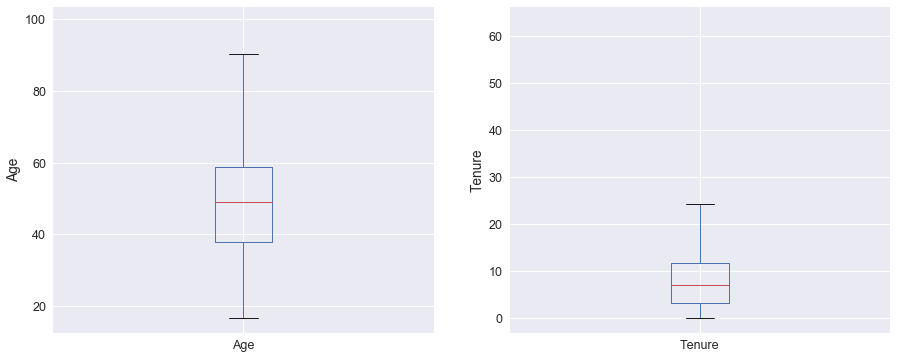

In [45]:
# let's make boxplots to visualise outliers in the continuous variables 
# Tenure and Age

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = data1.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(1, 2, 2)
fig = data1.boxplot(column='Tenure')
fig.set_title('')
fig.set_ylabel('Tenure')

*Notably the above boxplots reveal that the variables Age and Tenure do not have any outliers*

## Examining Outliers for the discrete variables
Let's calculate the percentage of policyholders for each  of the values that can take the discrete variables in the insurance dataset. I will call outliers, those values that are present in less than 1% of the policyholders. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in escence can be pre-processed / engineered as if they were categorical. Keep this in mind.

In [88]:
# outlies in discrete variables
for var in ['CustomerSegment','CHANNEL1_6M',  'CHANNEL2_6M', 'CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M','METHOD1_6M', 'PAYMENTS_6M', 'EVENT2_90_SUM','LOGINS']:
    print(data1[var].value_counts() / np.float(len(data)))
    print()

1    0.761281
2    0.193918
3    0.038582
Name: CustomerSegment, dtype: float64

0     0.923197
1     0.012753
2     0.012484
6     0.011631
5     0.009855
3     0.009717
4     0.009394
7     0.002760
8     0.001084
9     0.000538
10    0.000254
11    0.000077
12    0.000038
Name: CHANNEL1_6M, dtype: float64

0     0.729118
1     0.063020
6     0.059299
4     0.039812
5     0.036753
2     0.031979
3     0.030649
7     0.002406
8     0.000369
9     0.000092
10    0.000092
11    0.000092
12    0.000054
53    0.000023
23    0.000008
13    0.000008
17    0.000008
Name: CHANNEL2_6M, dtype: float64

0     0.790800
6     0.064104
1     0.037468
5     0.030457
4     0.028866
3     0.020809
2     0.019172
7     0.001653
8     0.000177
9     0.000123
10    0.000069
12    0.000054
26    0.000015
11    0.000015
Name: CHANNEL3_6M, dtype: float64

0     0.793790
1     0.113025
2     0.040404
3     0.017350
4     0.010639
6     0.008648
5     0.007264
7     0.001307
8     0.000638
9     0.000254
10  

**CustomerSegment** does not contain outliers, as all its numbers are present in at least 3% of the policyholders.

**CHANNEL1_6M to CHANNEL5_6M**
These variables indicate the number of payment made through channels 1 through 5 in the last 6 months. Values larger than 6 are considered rare. So values for these variables will be capped this variable at 6 (top coding).

**METHOD1_6M**
This variable indicates the number of payments made with method 1 irrespective of channel in the last 6 months . Values larger than 7 are considered rare. So values for these variables will be capped this variable at 7 (top coding).

**PAYMENTS_6M**
This variable indicates the number of total payments made within 6 months . Values larger than 8 are considered rare. So values for these variables will be capped this variable at 8 (top coding).

**EVENT2_90_SUM**
This variable indicates the number of cancellation notices sent out in the last 90 days . Values larger than 2 are considered rare. So values for these variables will be capped this variable at 2 (top coding).

**LOGINS**
This variable indicates the number of times a policyholder logged into self-service online in the last 30 days. Values larger than 6 are considered rare. So values for these variables will be capped this variable at 6 (top coding).


### Outliers in Numerical variables

We will need tp preprocess numerical variables with **outliers**. Steps to be undertaken are summarized below:

- CHANNEL1_6M to CHANNEL5_6M: top-coding (6)
- METHOD1_6M: top-coding(7) 
- PAYMENTS_6M: top-coding (8)
- EVENT2_90_SUM: top-coding (2)
- LOGINS: top-coding (6)


### Separate train and test set

In [89]:
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data1, data1.Call_Flag, test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((103421, 19), (25856, 19))

In [90]:
#Applying Top-coding
def top_code(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])

for df in [X_train, X_test]:
    df['CHANNEL1_6M'] = top_code(df, 'CHANNEL1_6M', 6)
    df['CHANNEL2_6M'] = top_code(df, 'CHANNEL2_6M', 6)
    df['CHANNEL3_6M'] = top_code(df, 'CHANNEL3_6M', 6)
    df['CHANNEL4_6M'] = top_code(df, 'CHANNEL4_6M', 6)
    df['CHANNEL5_6M'] = top_code(df, 'CHANNEL5_6M', 6)
    df['METHOD1_6M'] = top_code(df, 'METHOD1_6M', 7)
    df['PAYMENTS_6M'] = top_code(df, 'PAYMENTS_6M', 8)
    df['EVENT2_90_SUM'] = top_code(df, 'EVENT2_90_SUM', 2)
    df['LOGINS'] = top_code(df, 'LOGINS', 6)

In [92]:
# let's check that it worked
for var in ['CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M','METHOD1_6M', 'PAYMENTS_6M', 'EVENT2_90_SUM','LOGINS']:
    print(var, ' max value: ', X_train[var].max())

CHANNEL1_6M  max value:  6
CHANNEL2_6M  max value:  6
CHANNEL3_6M  max value:  6
CHANNEL4_6M  max value:  6
CHANNEL5_6M  max value:  6
METHOD1_6M  max value:  7
PAYMENTS_6M  max value:  8
EVENT2_90_SUM  max value:  2
LOGINS  max value:  6


### Engineering rare labels in categorical variables

In [93]:
# find unfrequent labels in categorical variables
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

RTD_ST_CD ST_S7     0.188617
ST_S9     0.144545
ST_S0     0.065461
ST_S14    0.059437
ST_S4     0.048327
ST_S42    0.045474
ST_S22    0.043337
ST_S6     0.036840
ST_S11    0.032788
ST_S3     0.024279
ST_S16    0.023090
ST_S25    0.020576
ST_S20    0.018652
ST_S33    0.017753
ST_S12    0.017646
ST_S2     0.014833
ST_S39    0.014185
ST_S32    0.013856
ST_S24    0.012657
ST_S38    0.012551
ST_S21    0.010288
ST_S1     0.008944
ST_S10    0.008886
ST_S8     0.007900
ST_S44    0.007697
ST_S17    0.007484
ST_S13    0.007213
ST_S50    0.006527
ST_S19    0.005550
ST_S28    0.005521
ST_S40    0.005270
ST_S15    0.004825
ST_S35    0.004622
ST_S41    0.004564
ST_S48    0.004351
ST_S27    0.004206
ST_S18    0.004196
ST_S36    0.004148
ST_S31    0.004071
ST_S29    0.003781
ST_S34    0.003761
ST_S37    0.003655
ST_S23    0.003375
ST_S43    0.003162
ST_S26    0.002514
ST_S45    0.002388
ST_S30    0.002166
ST_S5     0.001325
ST_S47    0.001247
ST_S46    0.000754
ST_S49    0.000706
Name: RTD_ST_CD, dtyp

- MART_STATUS and GENDER do not contain rare labels since all lables of both variables have more than 1% of the policyholders.
- RTD_ST_CD, on the other hand, contains a lot of infrequent labels and will be replaced by *rare*

## Imputation for rare labels using the word - *rare*

In [94]:
def rare_imputation(variable, which='rare'):    
    # find frequent labels
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.01].index.values]
    
    # create new variables, with Rare labels imputed
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
    

In [95]:
rare_imputation('RTD_ST_CD', 'rare')

In [96]:
# let's check that it worked
for var in categorical:
    print(var, X_train[var].value_counts()/np.float(len(X_train)))
    print()

RTD_ST_CD ST_S7     0.188617
ST_S9     0.144545
Rare      0.134808
ST_S0     0.065461
ST_S14    0.059437
ST_S4     0.048327
ST_S42    0.045474
ST_S22    0.043337
ST_S6     0.036840
ST_S11    0.032788
ST_S3     0.024279
ST_S16    0.023090
ST_S25    0.020576
ST_S20    0.018652
ST_S33    0.017753
ST_S12    0.017646
ST_S2     0.014833
ST_S39    0.014185
ST_S32    0.013856
ST_S24    0.012657
ST_S38    0.012551
ST_S21    0.010288
Name: RTD_ST_CD, dtype: float64

MART_STATUS MS_S2    0.447327
MS_S1    0.351495
MS_S3    0.103277
MS_S4    0.060481
MS_S0    0.037420
Name: MART_STATUS, dtype: float64

GENDER M    0.537028
F    0.462972
Name: GENDER, dtype: float64



### Encode categorical variables


In [97]:
categorical

['RTD_ST_CD', 'MART_STATUS', 'GENDER']

- GENDER: one hot encoding
- Remaining variables: replace by risk probability

In [98]:
for df in [X_train, X_test]:
    df['GENDER']  = pd.get_dummies(df.GENDER, drop_first=True)

In [99]:
X_train.GENDER.unique()

array([0, 1], dtype=uint64)

In [100]:
X_test.GENDER.unique()

array([1, 0], dtype=uint64)

In [101]:
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        
# enccode labels in categorical vars
for var in ['MART_STATUS','RTD_ST_CD']:
    encode_categorical_variables(var, 'Call_Flag')

In [102]:
#let's inspect the dataset
X_train.head()

,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
92661,0.034814,1,3.263518,47.720739,0.031753,0,0,0,6,0,0,0,0,6,0,0,0,0,0
37650,0.032546,1,9.941136,78.655715,0.031753,1,0,0,1,0,0,0,0,1,0,0,0,0,0
63544,0.041276,1,6.683094,34.910335,0.031753,1,0,0,0,0,0,2,0,3,0,0,4,1,0
67227,0.037158,2,6.351814,29.341547,0.031753,0,0,6,0,0,0,6,0,6,0,0,0,0,0
10118,0.033113,1,17.149897,52.082136,0.031753,1,0,0,0,0,0,0,0,4,0,2,4,0,0


*We can see that the labels how now been replaced by the survival probability.*

### Feature Scaling

In [103]:
X_train.describe()

,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,NOT_DI_6M,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000,103421.000000
mean,0.036153,1.273871,8.599089,48.793707,0.036153,0.537028,0.252840,0.941666,0.806355,0.394659,0.562893,1.785730,0.106042,4.792528,0.080254,0.189710,0.833225,0.131308,0.036153
std,0.004846,0.526542,7.292197,14.046783,0.004249,0.498629,1.038122,1.847207,1.808211,1.018385,1.580570,2.453946,0.307893,1.853317,0.271688,0.492429,1.336519,0.337738,0.186672
min,0.023177,1.000000,0.032854,16.689938,0.031753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033113,1.000000,3.255305,37.812457,0.031753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.037158,1.000000,7.008898,49.065024,0.038705,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.040908,1.000000,11.671458,58.830938,0.038705,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.046755,3.000000,63.091034,99.348392,0.046512,1.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,1.000000,8.000000,1.000000,2.000000,6.000000,1.000000,1.000000


In [ ]:
variables_that_need_scaling = ['CustomerSegment', 'Age', 'Tenure', 'CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M' 'METHOD1_6M', 'PAYMENTS_6M', 'EVENT2_90_SUM', 'LOGINS']

In [105]:
training_vars = [var for var in X_train.columns if var not in ['Call_Flag']]
training_vars

['RTD_ST_CD',
 'CustomerSegment',
 'Tenure',
 'Age',
 'MART_STATUS',
 'GENDER',
 'CHANNEL1_6M',
 'CHANNEL2_6M',
 'CHANNEL3_6M',
 'CHANNEL4_6M',
 'CHANNEL5_6M',
 'METHOD1_6M',
 'RECENT_PAYMENT',
 'PAYMENTS_6M',
 'NOT_DI_6M',
 'EVENT2_90_SUM',
 'LOGINS',
 'POLICYPURCHASECHANNEL']

In [106]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set and then transform it

MinMaxScaler(copy=True, feature_range=(0, 1))

The scaler is now ready, we can use it in a machine learning algorithm when required. See below.

### Machine Learning algorithm building

#### xgboost

In [118]:
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train[training_vars])
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test[training_vars])
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

xgb train roc-auc: 0.8735151290062012
xgb test roc-auc: 0.8694023730701881


#### Random Forests

In [119]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train[training_vars], y_train)

pred = rf_model.predict_proba(X_train[training_vars])
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test[training_vars])
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

RF train roc-auc: 0.9997741453822084
RF test roc-auc: 0.7354976914437834


#### Adaboost

In [120]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train[training_vars], y_train)

pred = ada_model.predict_proba(X_train[training_vars])
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test[training_vars])
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.8634832852450467
Adaboost test roc-auc: 0.8610415744019


#### Logistic regression

In [121]:
logit_model = LogisticRegression()
logit_model.fit(scaler.transform(X_train[training_vars]), y_train)

pred = logit_model.predict_proba(scaler.transform(X_train[training_vars]))
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = logit_model.predict_proba(scaler.transform(X_test[training_vars]))
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Logit train roc-auc: 0.8533456007649123
Logit test roc-auc: 0.853279834041682


### Select threshold for maximum accuracy

In [122]:
pred_ls = []
for model in [xgb_model, rf_model, ada_model, logit_model]:
    pred_ls.append(pd.Series(model.predict_proba(X_test[training_vars])[:,1]))

final_pred = pd.concat(pred_ls, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.8502301419715177


In [123]:
tpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred)
thresholds

array([ 1.74585636,  0.74585636,  0.72390564, ...,  0.11657495,
        0.11657495,  0.11448663])

In [124]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
64,0.614083,0.962369
63,0.614216,0.962369
62,0.614304,0.962330
66,0.611996,0.962291
61,0.614947,0.962291


### Feature importance

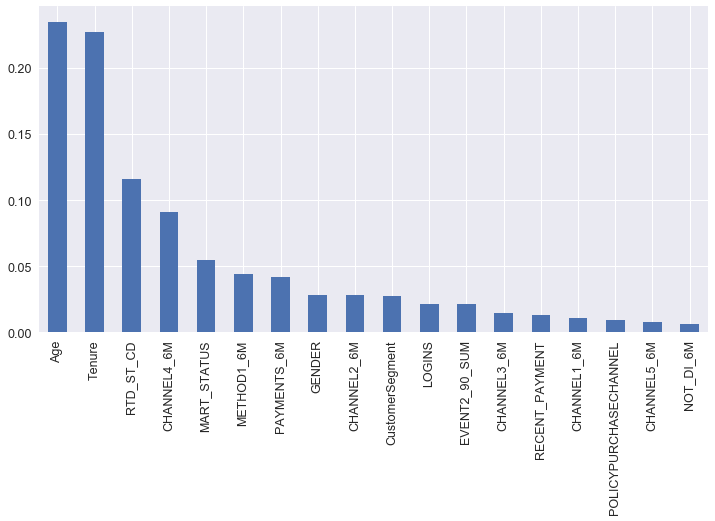

In [125]:
importance = pd.Series(rf_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

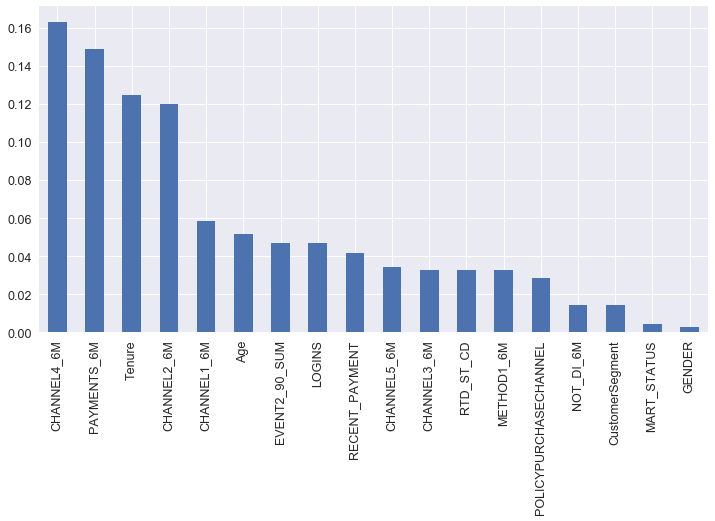

In [126]:
importance = pd.Series(xgb_model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

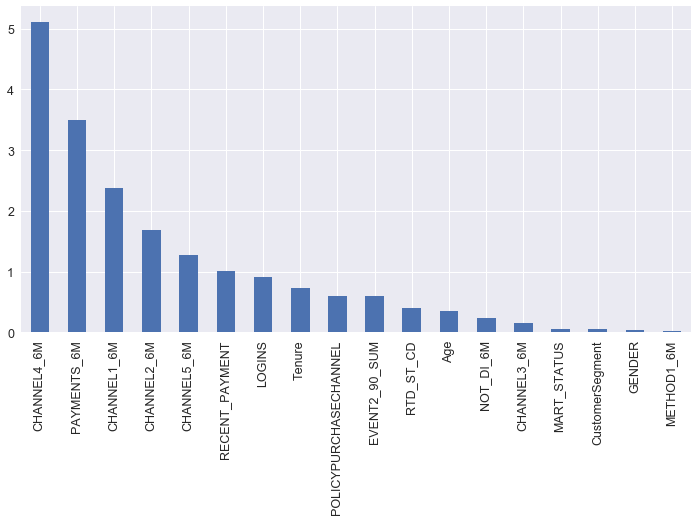

In [127]:
importance = pd.Series(np.abs(logit_model.coef_.ravel()))
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))